# Project: Investigate a Dataset (FBI Gun Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

 <a id='intro'></a>
# Introduction



### Dataset Description

The dataset for this project is from the FBI's National Instant Criminal Background Check System(NICS). The NICS is used to determine whether a prospective buyer is eligible to buy firearm or explosives. In this research we are going to focus on the variation in arm possesion over the given period of time and compare the various gun type with the given states.

### Questions for Analysis
* Gun trends per permit by states
* Hand/Long gun trend by states in year 2016
* States with highest and least gun per Capita and per total
* The first ten states with maximum/minimum number of total guns in 2016

In [1]:
# import statements for all of the packages that we will use

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling




In [2]:
#loading the gun_data
df_gun = pd.read_excel('gun-data.xlsx')
df_gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [3]:
# To determine the number of rows and columns of the gun dataset
df_gun.shape

(12485, 27)

In [4]:
# To check the datatype and number og non values of the variables
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [5]:
# To check for the sum of duplicated entries
df_gun.duplicated().sum()

0

In [6]:
# To check for sum of null values
df_gun.isnull().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

In [7]:
#check for null values in percentage and round to 4  significant figures
df_gun.isnull().mean().round(4)*100

month                         0.00
state                         0.00
permit                        0.19
permit_recheck               91.19
handgun                       0.16
long_gun                      0.15
other                        55.95
multiple                      0.00
admin                         0.18
prepawn_handgun              15.56
prepawn_long_gun             15.58
prepawn_other                59.03
redemption_handgun           15.54
redemption_long_gun          15.55
redemption_other             59.03
returned_handgun             82.38
returned_long_gun            82.82
returned_other               85.46
rentals_handgun              92.07
rentals_long_gun             93.39
private_sale_handgun         77.97
private_sale_long_gun        77.97
private_sale_other           77.97
return_to_seller_handgun     80.18
return_to_seller_long_gun    77.97
return_to_seller_other       81.94
totals                        0.00
dtype: float64

In [8]:
# Loading the census_data
df_census = pd.read_csv('u.s.-census-data.csv')
df_census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [9]:
# Determine the number of rows and columns of the census data
df_census.shape

(85, 52)

In [10]:
#To check the datatype and number of non values in the variables
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

In [11]:
# To check for the sum of duplicated entries
df_census.duplicated().sum()

3

In [12]:
# To check for sum of null values
df_census.isnull().sum()

Fact               5
Fact Note         57
Alabama           20
Alaska            20
Arizona           20
Arkansas          20
California        20
Colorado          20
Connecticut       20
Delaware          20
Florida           20
Georgia           20
Hawaii            20
Idaho             20
Illinois          20
Indiana           20
Iowa              20
Kansas            20
Kentucky          20
Louisiana         20
Maine             20
Maryland          20
Massachusetts     20
Michigan          20
Minnesota         20
Mississippi       20
Missouri          20
Montana           20
Nebraska          20
Nevada            20
New Hampshire     20
New Jersey        20
New Mexico        20
New York          20
North Carolina    20
North Dakota      20
Ohio              20
Oklahoma          20
Oregon            20
Pennsylvania      20
Rhode Island      20
South Carolina    20
South Dakota      20
Tennessee         20
Texas             20
Utah              20
Vermont           20
Virginia     

In [13]:
#check for null values in percentage and round to 4 significant figures
df_census.isnull().mean().round(4)*100

Fact               5.88
Fact Note         67.06
Alabama           23.53
Alaska            23.53
Arizona           23.53
Arkansas          23.53
California        23.53
Colorado          23.53
Connecticut       23.53
Delaware          23.53
Florida           23.53
Georgia           23.53
Hawaii            23.53
Idaho             23.53
Illinois          23.53
Indiana           23.53
Iowa              23.53
Kansas            23.53
Kentucky          23.53
Louisiana         23.53
Maine             23.53
Maryland          23.53
Massachusetts     23.53
Michigan          23.53
Minnesota         23.53
Mississippi       23.53
Missouri          23.53
Montana           23.53
Nebraska          23.53
Nevada            23.53
New Hampshire     23.53
New Jersey        23.53
New Mexico        23.53
New York          23.53
North Carolina    23.53
North Dakota      23.53
Ohio              23.53
Oklahoma          23.53
Oregon            23.53
Pennsylvania      23.53
Rhode Island      23.53
South Carolina  

### Report on Data Wrangling

From the above lines and resuts of code, we can see that:

The gun_data contains 12485 rows and 27 columns while the census data has 85 rows and 52 columns. There are no duplicated entries in the gun_data but the census data contains 3 duplicated rows/columns. gun_data has the columns month and state as strings, multiple and totals as integers, all others are in floats while the census_data has all columns as strings.

gun_data has month, state, multiple and totals as columns with no empty entries and census_data has all no non null entries. Rentals long_gun has the highest percentage of null values with 93.39% while long_gun had the least with only 0.16% Fact Note has the highest number of null values with 67.06% and Fact, the least with 5.88%


### Data Cleaning (gun and census data)

Based on the wrangling process, we will clean the data in the following steps...
* Drop columns with more than 30% null value and columns not needed for this study
* Fill all empty cells with 0 in the gun data
* Drop columns with NaN in the census data
* Rename columns in the census data for easy accessibility
* convert the variables to the appropriate data types for exploration.

In [14]:
#To check for columns in the gun_data
df_gun.columns

Index(['month', 'state', 'permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals'],
      dtype='object')

In [15]:
#Drop columns with more than 30% null values
df_gun.drop(columns=['permit_recheck', 'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other',], inplace = True)
df_gun.columns

Index(['month', 'state', 'permit', 'handgun', 'long_gun', 'other', 'multiple',
       'admin', 'prepawn_handgun', 'prepawn_long_gun', 'totals'],
      dtype='object')

In [16]:
# Drop columns that are not important for this study
df_gun.drop(columns= ['multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun', 'totals'], inplace = True)
df_gun.head()

,month,state,permit,handgun,long_gun,other
0,2017-09,Alabama,16717.0,5734.0,6320.0,221.0
1,2017-09,Alaska,209.0,2320.0,2930.0,219.0
2,2017-09,Arizona,5069.0,11063.0,7946.0,920.0
3,2017-09,Arkansas,2935.0,4347.0,6063.0,165.0
4,2017-09,California,57839.0,37165.0,24581.0,2984.0


In [17]:
# To fill all empty cells with 0 in the gun_data
df_gun.fillna(value= 0, inplace = True)

In [18]:
df_gun

,month,state,permit,handgun,long_gun,other
0,2017-09,Alabama,16717.0,5734.0,6320.0,221.0
1,2017-09,Alaska,209.0,2320.0,2930.0,219.0
2,2017-09,Arizona,5069.0,11063.0,7946.0,920.0
3,2017-09,Arkansas,2935.0,4347.0,6063.0,165.0
4,2017-09,California,57839.0,37165.0,24581.0,2984.0
...,...,...,...,...,...,...
12480,1998-11,Virginia,0.0,14.0,2.0,0.0
12481,1998-11,Washington,1.0,65.0,286.0,0.0
12482,1998-11,West Virginia,3.0,149.0,251.0,0.0
12483,1998-11,Wisconsin,0.0,25.0,214.0,0.0


In [19]:
#To check for columns in the census 
df_census.columns

Index(['Fact', 'Fact Note', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida',
       'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [20]:
# remove the columns with NaN in the census data
df_census.drop(index = df_census.index[65:85], inplace = True)
df_census

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,"Veteran-owned firms, 2012",NaN,"41,943","7,953","46,780","25,915","252,377","51,722","31,056","7,206",...,8604,59379,"213,590","18,754","8,237","76,434","49,331","12,912","39,830","6,470"
61,"Nonveteran-owned firms, 2012",NaN,"316,984","56,091","427,582","192,988","3,176,341","469,524","281,182","60,318",...,66219,469392,"2,057,218","219,807","63,317","548,439","461,401","94,960","370,755","51,353"
62,"Population per square mile, 2010",NaN,94.4,1.2,56.3,56,239.1,48.5,738.1,460.8,...,10.7,153.9,96.3,33.6,67.9,202.6,101.2,77.1,105,5.8
63,"Land area in square miles, 2010",NaN,"50,645.33","570,640.95","113,594.08","52,035.48","155,779.22","103,641.89","4,842.36","1,948.54",...,75811,41234.9,"261,231.71","82,169.62","9,216.66","39,490.09","66,455.52","24,038.21","54,157.80","97,093.14"


In [21]:
#Drop the 'Fact Note' column because it isn't needed for the study
df_census.drop(columns = ['Fact Note'], inplace = True)
df_census

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010","4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,"Veteran-owned firms, 2012","41,943","7,953","46,780","25,915","252,377","51,722","31,056","7,206","185,756",...,8604,59379,"213,590","18,754","8,237","76,434","49,331","12,912","39,830","6,470"
61,"Nonveteran-owned firms, 2012","316,984","56,091","427,582","192,988","3,176,341","469,524","281,182","60,318","1,846,686",...,66219,469392,"2,057,218","219,807","63,317","548,439","461,401","94,960","370,755","51,353"
62,"Population per square mile, 2010",94.4,1.2,56.3,56,239.1,48.5,738.1,460.8,350.6,...,10.7,153.9,96.3,33.6,67.9,202.6,101.2,77.1,105,5.8
63,"Land area in square miles, 2010","50,645.33","570,640.95","113,594.08","52,035.48","155,779.22","103,641.89","4,842.36","1,948.54","53,624.76",...,75811,41234.9,"261,231.71","82,169.62","9,216.66","39,490.09","66,455.52","24,038.21","54,157.80","97,093.14"


source: https://www.freecodecamp.org/news/drop-list-of-rows-from-pandas-dataframe/#:~:text=To%20drop%20a%20row%20or%20column%20in%20a%20dataframe%2C%20you,method%20in%20the%20docs%20here.&text=Rows%20are%20labelled%20using%20the,Columns%20are%20labelled%20using%20names.

In [22]:
# To check if there is still any duplicated row in the dataset
df_census.duplicated().sum()

0

In [23]:
df_census.shape

(65, 51)

In [24]:
# Transpose the census data
df_census.set_index('Fact', inplace = True)
df_census = df_census.transpose().reset_index()

Source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transpose.html

df_census.head()

In [26]:
# To check for the new columns of the census data
df_census.columns

Index(['index', 'Population estimates, July 1, 2016,  (V2016)',
       'Population estimates base, April 1, 2010,  (V2016)',
       'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
       'Population, Census, April 1, 2010',
       'Persons under 5 years, percent, July 1, 2016,  (V2016)',
       'Persons under 5 years, percent, April 1, 2010',
       'Persons under 18 years, percent, July 1, 2016,  (V2016)',
       'Persons under 18 years, percent, April 1, 2010',
       'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
       'Persons 65 years and over, percent, April 1, 2010',
       'Female persons, percent,  July 1, 2016,  (V2016)',
       'Female persons, percent, April 1, 2010',
       'White alone, percent, July 1, 2016,  (V2016)',
       'Black or African American alone, percent, July 1, 2016,  (V2016)',
       'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
       'Asian alone, percent, July 1, 20

In [27]:
# To select the particular columns in the census data we'd be working with
df_census = df_census[['index', 'Population estimates, July 1, 2016,  (V2016)', 'Population, Census, April 1, 2010', 'Persons under 18 years, percent, July 1, 2016,  (V2016)', 'Persons under 18 years, percent, April 1, 2010']]
df_census.head()

Fact,index,"Population estimates, July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010"
0,Alabama,"4,863,300","4,779,736",22.60%,23.70%
1,Alaska,"741,894","710,231",25.20%,26.40%
2,Arizona,"6,931,071","6,392,017",23.50%,25.50%
3,Arkansas,"2,988,248","2,915,918",23.60%,24.40%
4,California,"39,250,017","37,253,956",23.20%,25.00%


In [28]:
# To check if there is a null entry in the dataset
df_census.isnull().sum()

Fact
index                                                      0
Population estimates, July 1, 2016,  (V2016)               0
Population, Census, April 1, 2010                          0
Persons under 18 years, percent, July 1, 2016,  (V2016)    0
Persons under 18 years, percent, April 1, 2010             0
dtype: int64

In [29]:
#Here, we renamed the columns for easy accessibility
df_census.columns = ['state', 'population_2016', 'population_2010', 'u18_apr_percent2016', 'u18_jul_percent2010']
df_census.head()

,state,population_2016,population_2010,u18_apr_percent2016,u18_jul_percent2010
0,Alabama,"4,863,300","4,779,736",22.60%,23.70%
1,Alaska,"741,894","710,231",25.20%,26.40%
2,Arizona,"6,931,071","6,392,017",23.50%,25.50%
3,Arkansas,"2,988,248","2,915,918",23.60%,24.40%
4,California,"39,250,017","37,253,956",23.20%,25.00%


In [30]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   state                50 non-null     object
 1   population_2016      50 non-null     object
 2   population_2010      50 non-null     object
 3   u18_apr_percent2016  50 non-null     object
 4   u18_jul_percent2010  50 non-null     object
dtypes: object(5)
memory usage: 2.1+ KB


In [31]:
# The column types aren't in the right type for exploratory data analysis, therefore we remove the commas and percentage symbols using the codes below:
df_census.population_2016 = df_census.population_2016.str.replace(',','')
df_census.population_2010 = df_census.population_2010.str.replace(',','')
df_census.u18_apr_percent2016 = df_census.u18_apr_percent2016.str.replace('%','')
df_census.u18_jul_percent2010 = df_census.u18_jul_percent2010.str.replace('%','')
df_census.head()

,state,population_2016,population_2010,u18_apr_percent2016,u18_jul_percent2010
0,Alabama,4863300,4779736,22.60,23.70
1,Alaska,741894,710231,25.20,26.40
2,Arizona,6931071,6392017,23.50,25.50
3,Arkansas,2988248,2915918,23.60,24.40
4,California,39250017,37253956,23.20,25.00


In [32]:
# Now, we can convert to the right datatypes
df_census.population_2016 = df_census.population_2016.astype(int)
df_census.population_2010 = df_census.population_2010.astype(int)
df_census.u18_apr_percent2016 = df_census.u18_apr_percent2016.astype(float)
df_census.u18_jul_percent2010 = df_census.u18_jul_percent2010.astype(float)
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                50 non-null     object 
 1   population_2016      50 non-null     int32  
 2   population_2010      50 non-null     int32  
 3   u18_apr_percent2016  50 non-null     float64
 4   u18_jul_percent2010  50 non-null     float64
dtypes: float64(2), int32(2), object(1)
memory usage: 1.7+ KB


In [33]:
df_census.head()

,state,population_2016,population_2010,u18_apr_percent2016,u18_jul_percent2010
0,Alabama,4863300,4779736,22.6,23.7
1,Alaska,741894,710231,25.2,26.4
2,Arizona,6931071,6392017,23.5,25.5
3,Arkansas,2988248,2915918,23.6,24.4
4,California,39250017,37253956,23.2,25.0


In [34]:
# To get the percentage value for adult population in 2010 and 2016. This is done by subtracting the existing percentage for the 2010/2016 adult population from 100
df_census['percent_adult_2016'] = 100 - df_census.u18_apr_percent2016
df_census['percent_adult_2010'] = 100 - df_census.u18_jul_percent2010
df_census.head()

,state,population_2016,population_2010,u18_apr_percent2016,u18_jul_percent2010,percent_adult_2016,percent_adult_2010
0,Alabama,4863300,4779736,22.6,23.7,77.4,76.3
1,Alaska,741894,710231,25.2,26.4,74.8,73.6
2,Arizona,6931071,6392017,23.5,25.5,76.5,74.5
3,Arkansas,2988248,2915918,23.6,24.4,76.4,75.6
4,California,39250017,37253956,23.2,25.0,76.8,75.0


In [35]:
# Then converted the percentages gotten to numbers(float)
df_census['adult_population_2016'] = (df_census.percent_adult_2016/100)* df_census.population_2016
df_census['adult_population_2010'] = (df_census.percent_adult_2010/100)* df_census.population_2010
df_census.head()

,state,population_2016,population_2010,u18_apr_percent2016,u18_jul_percent2010,percent_adult_2016,percent_adult_2010,adult_population_2016,adult_population_2010
0,Alabama,4863300,4779736,22.6,23.7,77.4,76.3,3.764194e+06,3.646939e+06
1,Alaska,741894,710231,25.2,26.4,74.8,73.6,5.549367e+05,5.227300e+05
2,Arizona,6931071,6392017,23.5,25.5,76.5,74.5,5.302269e+06,4.762053e+06
3,Arkansas,2988248,2915918,23.6,24.4,76.4,75.6,2.283021e+06,2.204434e+06
4,California,39250017,37253956,23.2,25.0,76.8,75.0,3.014401e+07,2.794047e+07


In [36]:
df_census.state.nunique()

50

In [37]:
#To save the already cleaned census data
df_census.to_csv('clean_census')

In [38]:
df_census.sample(5)

,state,population_2016,population_2010,u18_apr_percent2016,u18_jul_percent2010,percent_adult_2016,percent_adult_2010,adult_population_2016,adult_population_2010
12,Illinois,12801539,12830632,22.900,24.40,77.100,75.60,9.869987e+06,9.699958e+06
18,Maine,1331479,1328361,19.100,20.70,80.900,79.30,1.077167e+06,1.053390e+06
47,West Virginia,1831102,1852994,20.500,20.90,79.500,79.10,1.455726e+06,1.465718e+06
37,Pennsylvania,12784227,12702379,0.209,0.22,99.791,99.78,1.275751e+07,1.267443e+07
10,Hawaii,1428557,1360301,21.600,22.30,78.400,77.70,1.119989e+06,1.056954e+06


In [39]:
# Checking the number of unique values in both datasets, we found out that there are 5 states in the gun_data that aren't present in the census_data. Therefore we have to identify those states and drop them from the gun_data, so that we can concatenate or merge if need be.
gun_state = df_gun.state.unique()
census_state = df_census.state.unique()

invalid = []
for state in gun_state:
    if state not in census_state:
        invalid.append(state)
print(invalid)

['District of Columbia', 'Guam', 'Mariana Islands', 'Puerto Rico', 'Virgin Islands']


In [40]:
# We use a function to drop the states from the gun_data
def dropstate(states, df_gun):
    for state in states:        
        df_gun = df_gun[df_gun.state != state]
    return df_gun

In [41]:
df_gun = dropstate(invalid, df_gun)

In [42]:
df_gun.state.nunique()

50

In [43]:
df_gun.isnull().sum()

month       0
state       0
permit      0
handgun     0
long_gun    0
other       0
dtype: int64

In [44]:
df_gun.head()

,month,state,permit,handgun,long_gun,other
0,2017-09,Alabama,16717.0,5734.0,6320.0,221.0
1,2017-09,Alaska,209.0,2320.0,2930.0,219.0
2,2017-09,Arizona,5069.0,11063.0,7946.0,920.0
3,2017-09,Arkansas,2935.0,4347.0,6063.0,165.0
4,2017-09,California,57839.0,37165.0,24581.0,2984.0


In [45]:
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11350 entries, 0 to 12484
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   month     11350 non-null  object 
 1   state     11350 non-null  object 
 2   permit    11350 non-null  float64
 3   handgun   11350 non-null  float64
 4   long_gun  11350 non-null  float64
 5   other     11350 non-null  float64
dtypes: float64(4), object(2)
memory usage: 620.7+ KB


In [46]:
#checking the above, we see that the 'month' is a string, therefore, we convert to datetime.
df_gun.month = pd.to_datetime(df_gun.month)

In [47]:
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11350 entries, 0 to 12484
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   month     11350 non-null  datetime64[ns]
 1   state     11350 non-null  object        
 2   permit    11350 non-null  float64       
 3   handgun   11350 non-null  float64       
 4   long_gun  11350 non-null  float64       
 5   other     11350 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 620.7+ KB


In [48]:
df_gun.describe()

,permit,handgun,long_gun,other
count,11350.000000,11350.000000,11350.000000,11350.000000
mean,7040.389515,6509.303877,8575.439648,174.472423
std,24799.120415,8829.284061,9416.217660,956.508452
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1327.250000,2778.000000,0.000000
50%,813.500000,3622.500000,5893.000000,0.000000
75%,5136.750000,7987.750000,11021.500000,113.000000
max,522188.000000,107224.000000,108058.000000,77929.000000


In [49]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  50 non-null     object 
 1   population_2016        50 non-null     int32  
 2   population_2010        50 non-null     int32  
 3   u18_apr_percent2016    50 non-null     float64
 4   u18_jul_percent2010    50 non-null     float64
 5   percent_adult_2016     50 non-null     float64
 6   percent_adult_2010     50 non-null     float64
 7   adult_population_2016  50 non-null     float64
 8   adult_population_2010  50 non-null     float64
dtypes: float64(6), int32(2), object(1)
memory usage: 3.2+ KB


In [50]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Gun trends per permit)

In [51]:
df_gun.head()

,month,state,permit,handgun,long_gun,other
0,2017-09-01,Alabama,16717.0,5734.0,6320.0,221.0
1,2017-09-01,Alaska,209.0,2320.0,2930.0,219.0
2,2017-09-01,Arizona,5069.0,11063.0,7946.0,920.0
3,2017-09-01,Arkansas,2935.0,4347.0,6063.0,165.0
4,2017-09-01,California,57839.0,37165.0,24581.0,2984.0


[Text(0.5, 1.0, 'Month against Permit')]

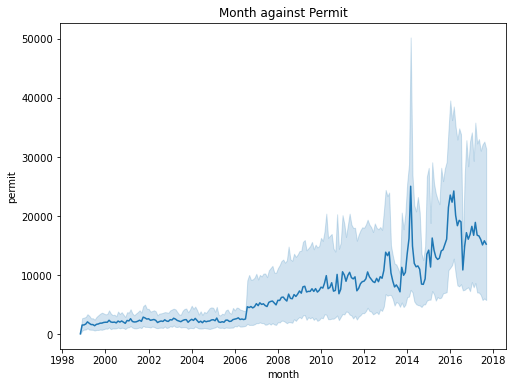

In [52]:
#Plotting the Month against the permit to show the trend of gun permit over time. The axis is diplayed in years because it is in datetime and contains several months 
fig , ax = plt.subplots(figsize=(8,6))
sns.lineplot(data= df_gun, x='month', y='permit', ax=ax).set(title = 'Month against Permit' )

From 1998 to 2006, there has been a stable flow of gun permits. After 2006 there was a little spike and it continued to increase gradually. 

Again, from 2012 there was a major spike around 2013, this dropped again before 2014 and exactly at 2014 there was a massive spike with over 25000 increase in gun permit that declined gradually till around 2015. 
The wavy trend continued until it got to 2018.

In [53]:
# We created a column that has the total number of guns added across the rows to be able to explore different insights from the data using the total as it relates to the firearm/explosves available
df_gun['total_no_guns'] =df_gun.handgun + df_gun.long_gun + df_gun.other
df_gun.head()

,month,state,permit,handgun,long_gun,other,total_no_guns
0,2017-09-01,Alabama,16717.0,5734.0,6320.0,221.0,12275.0
1,2017-09-01,Alaska,209.0,2320.0,2930.0,219.0,5469.0
2,2017-09-01,Arizona,5069.0,11063.0,7946.0,920.0,19929.0
3,2017-09-01,Arkansas,2935.0,4347.0,6063.0,165.0,10575.0
4,2017-09-01,California,57839.0,37165.0,24581.0,2984.0,64730.0


[Text(0.5, 1.0, 'Month against total gun')]

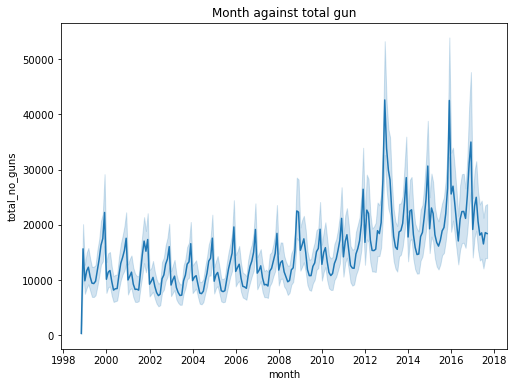

In [54]:
fig , ax = plt.subplots(figsize=(8, 6))
sns.lineplot(data=df_gun, x='month', y='total_no_guns', ax = ax ).set(title = 'Month against total gun')

The total number of guns acquired over time in months varies very obviously but there was a major streak at around 2014, 2016 and 2018 with 2014 as the year with the highest number of total guns acquired. 

### Research Question 2 (Hand and long gun trend by states in year 2016)

In [55]:
#To get the attributes for year 2016 only
g_2016 = df_gun[df_gun.month.dt.year == 2016]
g_2016.head()

,month,state,permit,handgun,long_gun,other,total_no_guns
495,2016-12-01,Alabama,26996.0,13733.0,17519.0,376.0,31628.0
496,2016-12-01,Alaska,254.0,4087.0,3698.0,243.0,8028.0
497,2016-12-01,Arizona,8900.0,18024.0,13785.0,1180.0,32989.0
498,2016-12-01,Arkansas,3294.0,9192.0,13433.0,277.0,22902.0
499,2016-12-01,California,61808.0,63649.0,93224.0,77929.0,234802.0


<ipython-input-56-74d2601c07ff>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  g_2016.groupby('state')['handgun', 'long_gun'].mean().plot.bar(figsize= (15, 6), title = "Hand and Long gun trend")


<AxesSubplot:title={'center':'Hand and Long gun trend'}, xlabel='state'>

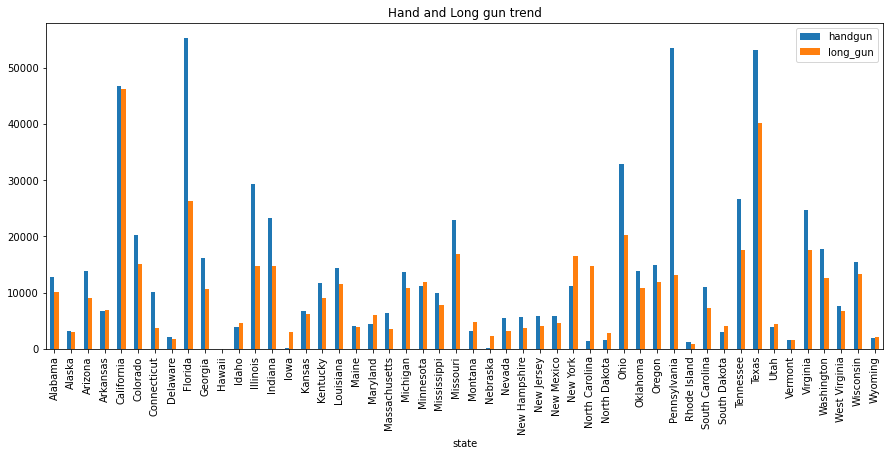

In [56]:
g_2016.groupby('state')['handgun', 'long_gun'].mean().plot.bar(figsize= (15, 6), title = "Hand and Long gun trend")

The multiple barchart above shows the trend of hand and long guns across the states. Florida is the state with the highest number of handguns followed by Pennysylvania and then Texas.

California is the state with the highest  number of long gun followed by Texas and Florida.
The number of hand and long guns in California are almost the same. 
California, and Texas have the highest number of both guns in all the available states.

In [57]:
# we grouped the various columns by the mean. I.e from January to December for each observation
gun = g_2016.groupby('state').mean()
gun.head()

,permit,handgun,long_gun,other,total_no_guns
state,,,,,
Alabama,24253.250000,12760.250000,10163.583333,508.666667,23432.500000
Alaska,260.083333,3124.250000,3073.916667,240.750000,6438.916667
Arizona,7314.250000,13898.666667,9082.333333,1093.500000,24074.500000
Arkansas,4621.333333,6687.000000,6843.333333,254.916667,13785.250000
California,86415.083333,46696.250000,46212.500000,17642.250000,110551.000000


In [58]:
df_census.head()

,state,population_2016,population_2010,u18_apr_percent2016,u18_jul_percent2010,percent_adult_2016,percent_adult_2010,adult_population_2016,adult_population_2010
0,Alabama,4863300,4779736,22.6,23.7,77.4,76.3,3.764194e+06,3.646939e+06
1,Alaska,741894,710231,25.2,26.4,74.8,73.6,5.549367e+05,5.227300e+05
2,Arizona,6931071,6392017,23.5,25.5,76.5,74.5,5.302269e+06,4.762053e+06
3,Arkansas,2988248,2915918,23.6,24.4,76.4,75.6,2.283021e+06,2.204434e+06
4,California,39250017,37253956,23.2,25.0,76.8,75.0,3.014401e+07,2.794047e+07


In [59]:
df_census.columns

Index(['state', 'population_2016', 'population_2010', 'u18_apr_percent2016',
       'u18_jul_percent2010', 'percent_adult_2016', 'percent_adult_2010',
       'adult_population_2016', 'adult_population_2010'],
      dtype='object')

In [60]:
# Extract these rows only from the census data
df_census_2016 = df_census[['state', 'adult_population_2016']]

In [61]:
df_census_2016.head()

,state,adult_population_2016
0,Alabama,3.764194e+06
1,Alaska,5.549367e+05
2,Arizona,5.302269e+06
3,Arkansas,2.283021e+06
4,California,3.014401e+07


In [62]:
df_census_2016.shape

(50, 2)

### Research Question 3 (States with highest/least gun per person and per total)

In [63]:
# To merge the 2016 adult population extracted from the gun data to the mean census data
df_2016 = pd.merge(gun, df_census_2016, how= 'outer', on= 'state')

In [64]:
df_2016.head()

,state,permit,handgun,long_gun,other,total_no_guns,adult_population_2016
0,Alabama,24253.250000,12760.250000,10163.583333,508.666667,23432.500000,3.764194e+06
1,Alaska,260.083333,3124.250000,3073.916667,240.750000,6438.916667,5.549367e+05
2,Arizona,7314.250000,13898.666667,9082.333333,1093.500000,24074.500000,5.302269e+06
3,Arkansas,4621.333333,6687.000000,6843.333333,254.916667,13785.250000,2.283021e+06
4,California,86415.083333,46696.250000,46212.500000,17642.250000,110551.000000,3.014401e+07


In [65]:
# To get the number of guns per capita(person)
df_2016['gun_per_capita'] = df_2016['total_no_guns']/df_2016.adult_population_2016
df_2016.head()

,state,permit,handgun,long_gun,other,total_no_guns,adult_population_2016,gun_per_capita
0,Alabama,24253.250000,12760.250000,10163.583333,508.666667,23432.500000,3.764194e+06,0.006225
1,Alaska,260.083333,3124.250000,3073.916667,240.750000,6438.916667,5.549367e+05,0.011603
2,Arizona,7314.250000,13898.666667,9082.333333,1093.500000,24074.500000,5.302269e+06,0.004540
3,Arkansas,4621.333333,6687.000000,6843.333333,254.916667,13785.250000,2.283021e+06,0.006038
4,California,86415.083333,46696.250000,46212.500000,17642.250000,110551.000000,3.014401e+07,0.003667


In [66]:
# To derive the five states with the highest number of guns per capita
max_five = df_2016.nlargest(n= 5, columns= 'gun_per_capita')
max_five

,state,permit,handgun,long_gun,other,total_no_guns,adult_population_2016,gun_per_capita
1,Alaska,260.083333,3124.250000,3073.916667,240.750000,6438.916667,554936.712,0.011603
47,West Virginia,2233.833333,7677.000000,6758.750000,303.583333,14739.333333,1455726.090,0.010125
25,Montana,1709.333333,3128.916667,4736.166667,178.500000,8043.583333,815250.640,0.009866
49,Wyoming,661.500000,1880.750000,2151.250000,121.416667,4153.416667,446737.263,0.009297
28,New Hampshire,4028.916667,5710.750000,3723.416667,183.833333,9618.000000,1074509.975,0.008951


[Text(0.5, 1.0, 'State with Highest Gun per capita')]

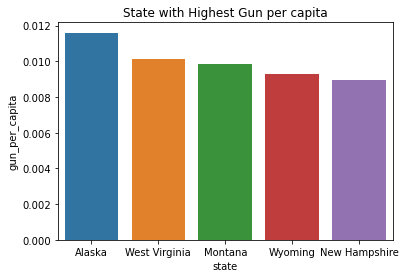

In [67]:
sns.barplot(data= max_five, x= 'state', y= 'gun_per_capita').set(title= 'State with Highest Gun per capita')

The barchart above shows that for the year 2016, Alaska is the highest state with total gun per person(per capita) for the first 5 highest states.

[Text(0.5, 1.0, 'State with Highest Gun per capita')]

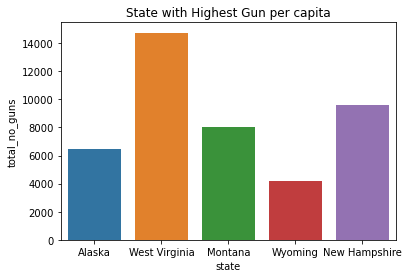

In [68]:
sns.barplot(data= max_five, x= 'state', y= 'total_no_guns').set(title= 'State with Highest Gun per capita')

Here, the barchart shows that from the 5 top states with the highest number of guns, West Virginia has the highest total number of guns. Which is quite different from the first chart we plotted that claims that Alaska is the state with the highest number of guns owned by one person for the first 5 states with highest guns per person.

This shows that Alaska might be the state with the highest number of guns per person but West Virginia is the state with the highest total number of guns.

In [69]:
#The last five states with least number of guns per person.
min_five = df_2016.nsmallest(n=5, columns= 'gun_per_capita')
min_five

,state,permit,handgun,long_gun,other,total_no_guns,adult_population_2016,gun_per_capita
10,Hawaii,1385.583333,0.000000,0.000000,0.000000,0.000000,1.119989e+06,0.000000
14,Iowa,13486.750000,232.500000,2937.833333,32.750000,3203.083333,2.404310e+06,0.001332
31,New York,4137.166667,11107.083333,16472.500000,1041.666667,28621.250000,1.970343e+07,0.001453
29,New Jersey,0.000000,5854.083333,4091.583333,208.750000,10154.416667,6.958797e+06,0.001459
26,Nebraska,4865.500000,143.083333,2207.833333,21.666667,2372.583333,1.434151e+06,0.001654


<AxesSubplot:xlabel='state', ylabel='gun_per_capita'>

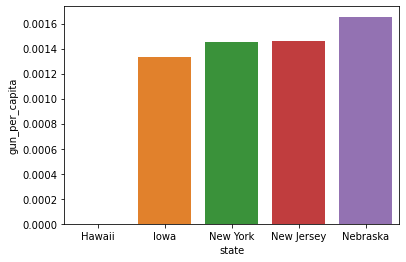

In [70]:
sns.barplot(data= min_five, x='state', y= 'gun_per_capita')

Hawaii is the state with the leat number of guns per person even when categorized as the last 5 states.

<AxesSubplot:xlabel='state'>

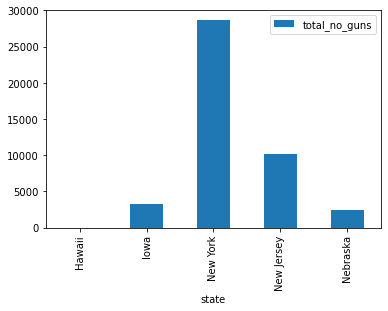

In [71]:
min_five.plot(x= 'state', y= 'total_no_guns', kind = 'bar')

The above charts shows the last 5 states with the least number of guns per person. 
Hawaii is the state with the least number of guns per person(almost totally empty), followed by Iowa and New York state.

Also for the last 5 states with the least number of total, Hawaii is also the least followed by Nebraska and then Iowa.

### Research Question 4 (The First ten states with maximum/minimum number of total guns in 2016)

In [72]:
#Top 10 states with the highest number of total guns in 2016
top_total_gun = df_2016.nlargest(n= 10, columns= 'total_no_guns')
top_total_gun

,state,permit,handgun,long_gun,other,total_no_guns,adult_population_2016,gun_per_capita
4,California,86415.083333,46696.250000,46212.500000,17642.250000,110551.000000,3.014401e+07,0.003667
42,Texas,32538.500000,53123.000000,40134.083333,3360.750000,96617.833333,2.056260e+07,0.004699
8,Florida,28090.500000,55192.333333,26352.666667,3536.583333,85081.583333,1.646934e+07,0.005166
37,Pennsylvania,27812.916667,53519.333333,13178.416667,20.750000,66718.500000,1.275751e+07,0.005230
34,Ohio,13954.083333,32880.833333,20330.250000,1999.416667,55210.500000,1.158824e+07,0.004764
41,Tennessee,8840.166667,26597.416667,17513.416667,417.583333,44528.416667,6.636162e+06,0.006710
12,Illinois,80244.166667,29367.583333,14771.250000,0.000000,44138.833333,9.869987e+06,0.004472
45,Virginia,818.083333,24663.583333,17497.916667,1045.583333,43207.083333,6.544387e+06,0.006602
24,Missouri,7581.000000,22896.166667,16892.333333,1450.333333,41238.833333,4.703796e+06,0.008767
13,Indiana,78909.333333,23181.833333,14768.166667,1480.333333,39430.333333,5.054386e+06,0.007801


<AxesSubplot:xlabel='state', ylabel='total_no_guns'>

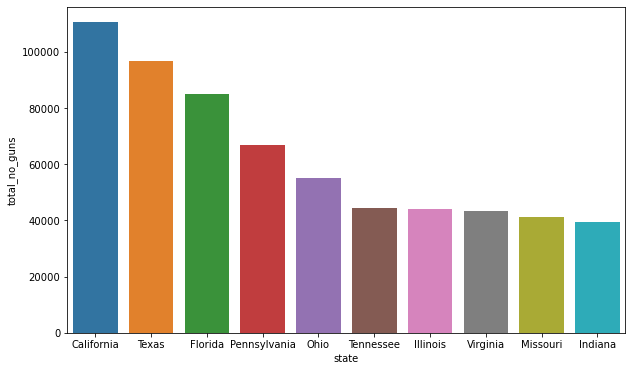

In [73]:
fig, ax = plt.subplots(figsize= (10,6))
sns.barplot(data= top_total_gun, x= 'state', y= 'total_no_guns')

The chart above shows the first 10 states with the highest number of total amount of guns in 2016. California comes first, this means that California has the highest number of guns generally 

In [74]:
#Last 10 states with the least number of total guns in 2016
least_total_gun = df_2016.nsmallest(n= 10, columns= 'total_no_guns')
least_total_gun

,state,permit,handgun,long_gun,other,total_no_guns,adult_population_2016,gun_per_capita
10,Hawaii,1385.583333,0.000000,0.000000,0.000000,0.000000,1.119989e+06,0.000000
38,Rhode Island,0.000000,1188.500000,850.333333,73.750000,2112.583333,1.054345e+06,0.002004
26,Nebraska,4865.500000,143.083333,2207.833333,21.666667,2372.583333,1.434151e+06,0.001654
14,Iowa,13486.750000,232.500000,2937.833333,32.750000,3203.083333,2.404310e+06,0.001332
44,Vermont,0.000000,1526.666667,1571.083333,107.583333,3205.333333,5.059211e+05,0.006336
7,Delaware,703.333333,2131.166667,1812.166667,105.666667,4049.000000,7.473710e+05,0.005418
49,Wyoming,661.500000,1880.750000,2151.250000,121.416667,4153.416667,4.467373e+05,0.009297
33,North Dakota,1103.333333,1664.583333,2834.416667,107.000000,4606.000000,7.561860e+05,0.006091
1,Alaska,260.083333,3124.250000,3073.916667,240.750000,6438.916667,5.549367e+05,0.011603
40,South Dakota,1356.583333,3043.333333,4126.833333,261.166667,7431.333333,8.633250e+05,0.008608


<AxesSubplot:xlabel='state', ylabel='total_no_guns'>

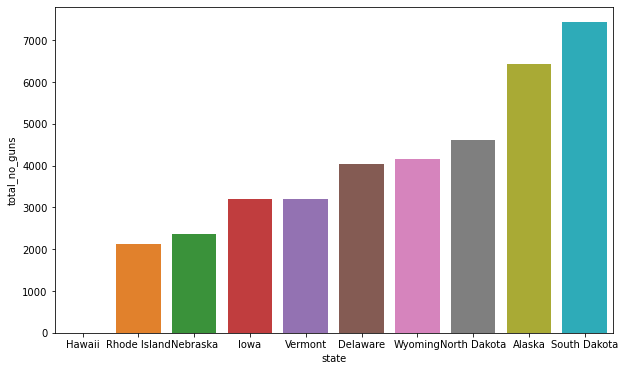

In [75]:
fig, ax = plt.subplots(figsize= (10,6))
sns.barplot(data= least_total_gun, x= 'state', y= 'total_no_guns')

Hawaii is the state with the least number of total number of firearms and explosives.

The state with the highest number of total guns is California with over 100000 number of guns possessed in the year 2016, followed by Texas, Florida etc... while the least is Hawaii, followed by Rhode Island etc...

<a id='conclusions'></a>
## Conclusions


The gun data contained the various types of guns acquired by 55 different states and their number of permits while the census data contained the count of people from different work places, organisations and ethnic groups from 50 different states.

There were 5 states difference between the gun and census data. The census data had the states arranged in columns in the raw data(before cleaning and exploration) which is different from the gun data that has the states arranged in rows; so, we transposed the census so that it can be used with the gun data and merge. The census data also had some empty cells at the end of the raw file; hence the dropping of those NaN rows before transposing.
Much of the data cleaning happened in the census data. We removed the columns with over 30% volume of empty/null cells from both datasets so as to get accurate results from our study. We then went ahead to select the columns needed for exploration that includes the state, adult population for 2010 and 2016 and renamed their headings for easy accessibility. 
since firearms and explosives can only be owned/possesed by adults, we picked out the columns for adults only for exploration. 
Converted to the right datatypes, added the adult percentage for 2010 and 2016 to the dataset. 
Calculted percentage value for the adult population then converted the gotten values to numbers for the purpose of exploration.

Created a function to drop the states in gundata that aren't available in the census data and then merged both datasets for visualizations.

The visualizations were charts of:
* Gun trends per permit by states: we found out that from 1998 to 2006, there has been a stable flow of gun permits. After 2006 there was a little spike and it continued to increase gradually. Then again, from 2012 there was a major spike around 2013, this dropped again before 2014 and exactly at 2014 there was a massive spike with over 25000 increase in gun permit that declined gradually till around 2015. The wavy trend continued until it got to 2018.

* Hand/long gun trend by states in 2016: here, California, and Texas have the highest number of both guns in all the available states.

* States with highest/least gun per person and per total:  The barchart above shows that for the year 2016, Alaska is the highest state with total gun per person(per capita) for the first 5 highest states.
Hawaii is the state with the leat number of guns per person even when categorized as the last 5 states.

* The first/last ten states with maximum/minimum number of total guns in 2016: California and Hawaii had the highest and least total number of guns in 2016.


### Limitations

The most of all the limitations was getting the description of the variables in the datasets. The variable/column descriptions weren't made available and that affected how fast it was to understand the datasets and work with them and discover correlation or relationships between the variables
